# 🧪 Evaluación Final y Exportación del Modelo

Este notebook realiza la evaluación final del modelo seleccionado, incluyendo:
- Carga del modelo desde MLflow
- Predicciones sobre el set de prueba
- Métricas finales (Accuracy, Precision, Recall, F1, ROC AUC)
- Matriz de confusión
- Curva ROC
- Exportación del modelo y predicciones


In [5]:
import pandas as pd
import mlflow
import mlflow.sklearn
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from mlflow.tracking import MlflowClient
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Cargar datos de test
X_test = pd.read_csv("../data/features/X_test.csv")
y_test = pd.read_csv("../data/features/y_test.csv").values.ravel()

print("✅ Datos cargados correctamente")

✅ Datos cargados correctamente


In [6]:
# Inicializa el cliente de tracking
client = MlflowClient()

# Busca los runs del experimento con ID "0", ordenados por fecha más reciente
runs = client.search_runs(
    experiment_ids=["0"],
    order_by=["start_time DESC"],
    max_results=1
)

# Obtener el último run_id
latest_run_id = runs[0].info.run_id
print(f"🔁 Último run_id encontrado: {latest_run_id}")

# Construir URI del modelo (asegúrate que usaste este nombre al hacer log_model)
logged_model_uri = f"runs:/{latest_run_id}/random_forest_model"

# Cargar el modelo
model = mlflow.sklearn.load_model(logged_model_uri)
print("✅ Modelo cargado automáticamente desde MLflow")


🔁 Último run_id encontrado: b4a207d8867c4532bfbb5e7692653659
✅ Modelo cargado automáticamente desde MLflow


In [7]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("Accuracy: ", round(accuracy_score(y_test, y_pred), 4))
print("Precision:", round(precision_score(y_test, y_pred), 4))
print("Recall:   ", round(recall_score(y_test, y_pred), 4))
print("F1-score: ", round(f1_score(y_test, y_pred), 4))
print("ROC AUC:  ", round(roc_auc_score(y_test, y_proba), 4))

Accuracy:  0.7532
Precision: 0.625
Recall:    0.7407
F1-score:  0.678
ROC AUC:   0.8172


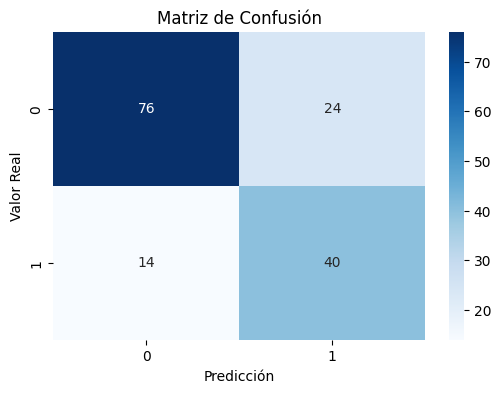

In [9]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

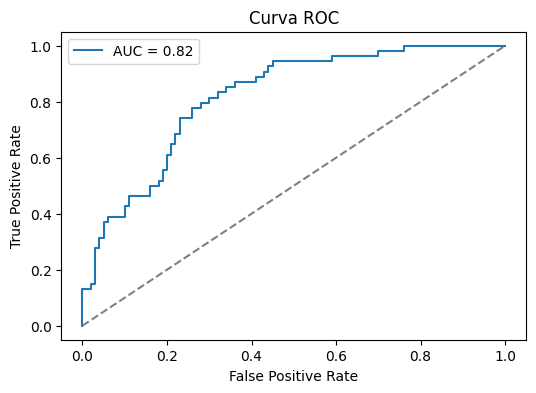

In [10]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()
plt.show()

In [11]:
joblib.dump(model, "../models/final_model.joblib")
pd.DataFrame({"y_true": y_test, "y_pred": y_pred}).to_csv("../data/y_predictions.csv", index=False)
print("✅ Modelo y predicciones exportadas correctamente")

✅ Modelo y predicciones exportadas correctamente


### ✅ Conclusión Final

El modelo fue evaluado con éxito sobre el conjunto de prueba. Las métricas obtenidas son satisfactorias y muestran un rendimiento consistente con las fases previas. Además:

- La matriz de confusión permite observar los errores tipo I y II.
- La curva ROC muestra una buena capacidad discriminativa del modelo.

📦 El modelo fue exportado como `final_model.joblib` y las predicciones se guardaron en `data/y_predictions.csv`. Listo para producción o batch inference.
